## ***1- Olive Detection - Classification 1***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1-1. Import Required Libraries** 

In [ ]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Convolution2D, MaxPool2D, Activation, Dropout, Flatten, Input, Add, ZeroPadding2D, BatchNormalization, Conv2D, AveragePooling2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator

## ***1-2. Test/Train Data***

**Split the dataset**

**os.walk()-->**This function gives the possibility to list the contents of a directory. For example, it is used to find out which files and subdirectories are in the current directory.

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count = 0
  # crawls inside folders
  for current_path, dirs, files in os.walk(directory):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path, dr+"/*")))
  return count
train_dir = "/content/drive/MyDrive/dataset_olive/train"
test_dir  = "/content/drive/MyDrive/dataset_olive/test"

glob.glob()--> It is a module that helps to list files in a specific folder in python. Searches in subfolders.

In [ ]:
from keras.utils.data_utils import get_file
# train file image count
train_samples = get_files(train_dir)
# to get tags
num_classes = len(glob.glob(train_dir+"/*"))
# test file image count
test_samples = get_files(test_dir)
print(num_classes, "Classes")
print(train_samples, "Train images")
print(test_samples, "Test images")

3 Classes
5858 Train images
3552 Test images


## ***1-3. ImageDataGenerator***

**ImageDataGenerator**,Data augmentation is used to increase the size of training set and to get more different image. Through Data augmentation we can prevent overfitting ,this refers to randomly changing the images in ways that shouldn’t impact their interpretation, such as horizontal flipping, zooming, and rotating

*   **Rescale:** One of the many magnification parameters adjusts the pixel values of our image.
*   **Shear_range:** counterclockwise shear angle in degrees.
* **Zoom_range:** zoom.
* **Horizontal_flip:** flip image horizontally


In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)
test_datagen = ImageDataGenerator(
    rescale= 1./255
)

**flow_from_directory() -->** Another method to read images into TensorFlow environment is to use the .flow_from_directory() method. flow_from_directory is an ImageDataGenerator method. The dataset is read with flow_from_directory without making any changes.
**Parametrs:**


*   **directory:** The path of the target directory. It must contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF formatted images found in each of the subdirectories will be included in the generator.
*   **target_size:** A tuple of integers, (height, width), by default (256,256). All found images will be resized.
* **batch_size:** The size of the data chunks (default: 32).
* **shuffle:** Decides whether to shuffle data (default: True). If set to false, it sorts the data in alphanumeric order.



In [ ]:
input_shape = (224, 224, 3)
train_generator = train_datagen.flow_from_directory(train_dir, target_size= (224, 224), batch_size= 32)
test_generator = test_datagen.flow_from_directory(test_dir,shuffle= True, target_size= (224, 224), batch_size= 32)

Found 5858 images belonging to 3 classes.
Found 3552 images belonging to 3 classes.


## **1-4. CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = input_shape, activation= 'relu', name = 'conv2d_1' ))
model.add(MaxPooling2D(pool_size= (3, 3), name = 'max_pooling2d_1'))
model.add(Conv2D(32, (3, 3), activation= 'relu', name = 'conv2d_2'))
model.add(MaxPooling2D(pool_size= (2,2), name = 'max_pooling2d_2'))
model.add(Conv2D(64, (3, 3), activation= 'relu', name = 'conv2d_3'))
model.add(MaxPooling2D(pool_size = (2, 2), name = 'max_pooling2d_3'))
model.add(Flatten(name = 'flatten_1'))
model.add(Dense(512, activation= 'relu', name = 'dense_1'))
model.add(Dropout(0.25))
model.add(Dense(128, activation= 'relu', name= 'dense_2'))
model.add(Dense(num_classes, activation= 'softmax', name= 'dense_3'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)      

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size= (224, 224),
    batch_size= 32    
)

Found 3552 images belonging to 3 classes.


In [ ]:
from keras import callbacks
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history1 = model.fit(
    train_generator,
    steps_per_epoch = None,
    epochs = 2,
    validation_data= validation_generator,
    validation_steps= None,
    verbose= 1,
    callbacks = [ReduceLROnPlateau(monitor= 'val_loss', factor= 0.3, patience= 3, min_lr= 0.000001)],
    shuffle= True
)

Epoch 1/2
184/184 [==============================] - 1978s 11s/step - loss: 0.3549 - accuracy: 0.8312 - val_loss: 0.2433 - val_accuracy: 0.8967 - lr: 0.0010
Epoch 2/2
184/184 [==============================] - 470s 3s/step - loss: 0.1767 - accuracy: 0.9269 - val_loss: 0.1848 - val_accuracy: 0.9265 - lr: 0.0010


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models_olive/model_cl1_sequential.h5')

# **1-5. VGG19 Model**

In [ ]:
def create_Base_model_from_VGG19():  
    model_vgg19 = VGG19(
        weights = "imagenet",# control point from which model is started
        include_top=False, # to include/exclude the first 3 layers
        input_shape = (224,224, 3)) # image size
    # don't train existing weights 
    for layer in model_vgg19.layers:
      layer.trainable = False
    return model_vgg19 
create_Base_model_from_VGG19().summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
def add_custom_layers_vgg19():
    #Adding custom Layers 
    model_vgg19 = create_Base_model_from_VGG19()
    x = model_vgg19.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)   
    # creating the final model 
    final_model = tf.keras.models.Model(
        inputs = model_vgg19.input, 
        outputs = predictions)
     
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return final_model

add_custom_layers_vgg19().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 3552 images belonging to 3 classes.


In [ ]:
model_from_vgg19 = add_custom_layers_vgg19()
history3 = model_from_vgg19.fit(train_generator,
                      steps_per_epoch=None,
                      epochs=2,
                      validation_data=validation_generator,
                      validation_steps=None,
                      verbose=1,
                      callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
                      use_multiprocessing=False,
                      shuffle=True)

Epoch 1/2
184/184 [==============================] - 6148s 33s/step - loss: 0.1642 - accuracy: 0.9606 - val_loss: 0.3398 - val_accuracy: 0.9220 - lr: 0.0010
Epoch 2/2
184/184 [==============================] - 6088s 33s/step - loss: 0.1011 - accuracy: 0.9734 - val_loss: 0.0920 - val_accuracy: 0.9716 - lr: 0.0010


In [ ]:
model_from_vgg19.save('/content/drive/MyDrive/Colab Notebooks/models_olive/model_cl1_vgg19.h5')

# **1-6. AlexNet**

In [ ]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
# Initializing the CNN
model2 = Sequential()
# Convolution Step 1
model2.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
# Max Pooling Step 1
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model2.add(BatchNormalization())
# Convolution Step 2
model2.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
# Max Pooling Step 2
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model2.add(BatchNormalization())
# Convolution Step 3
model2.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model2.add(BatchNormalization())
# Convolution Step 4
model2.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model2.add(BatchNormalization())
# Convolution Step 5
model2.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# Max Pooling Step 3
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model2.add(BatchNormalization())
# Flattening Step
model2.add(Flatten())
# Full Connection Step
model2.add(Dense(units = 4096, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(units = 4096, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())
model2.add(Dense(units = 1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(units = num_classes, activation = 'softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 3552 images belonging to 3 classes.


In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model2.fit(    
    train_generator,
    steps_per_epoch=None,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/15
184/184 [==============================] - 1699s 9s/step - loss: 0.5675 - accuracy: 0.7999 - val_loss: 1.9993 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 2/15
184/184 [==============================] - 860s 5s/step - loss: 0.3083 - accuracy: 0.8711 - val_loss: 0.8714 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 3/15
184/184 [==============================] - 861s 5s/step - loss: 0.2419 - accuracy: 0.9022 - val_loss: 0.4111 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 4/15
184/184 [==============================] - 859s 5s/step - loss: 0.2873 - accuracy: 0.8826 - val_loss: 1.4710 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 5/15
184/184 [==============================] - 872s 5s/step - loss: 0.2714 - accuracy: 0.8919 - val_loss: 0.4331 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 6/15
184/184 [==============================] - 857s 5s/step - loss: 0.2068 - accuracy: 0.9150 - val_loss: 0.2556 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 7/15
184/184 [==============================] - 846s 5s/s

In [ ]:
model2.save('/content/drive/MyDrive/Colab Notebooks/models_olive/model_cl1_alexnet.h5')

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model2.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
111/111 [==============================] - 560s 5s/step - loss: 0.1608 - accuracy: 0.9364
Test Accuracy: 93.63738894462585


In [ ]:
results = model2.evaluate(test_generator, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

111/111 [==============================] - 119s 1s/step - loss: 0.1387 - accuracy: 0.9428
    Test Loss: 0.13872
Test Accuracy: 94.28%


In [ ]:
# Predict the label of the test_gen
pred = model2.predict(test_generator,verbose=1)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(train_generator.Label)
print(classification_report(y_test, pred))

## **2- Model Test**

***2-1. CNN Model***

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_cl1_sequential = load_model('/content/drive/MyDrive/Colab Notebooks/models_olive/model_cl1_sequential.h5')

Potato


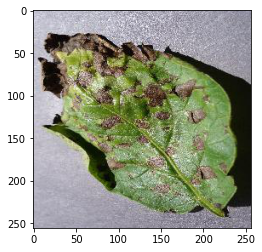

In [ ]:
classes_cnn = list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
  img = image.load_img(img_path, target_size = (224, 224))
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

img_url = '/content/drive/MyDrive/dataset_olive/test/Potato/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG'
result_cnn = model_cl1_sequential.predict([prepare(img_url)])
img_pred_cnn = image.load_img(img_url)
plt.imshow(img_pred_cnn)

classresult_cnn = np.argmax(result_cnn, axis=1)
print(classes_cnn[classresult_cnn[0]] )

***2-2. VGG19 Model***

In [ ]:
# load model vgg19
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_vgg19 = load_model('/content/drive/MyDrive/Colab Notebooks/models_olive/model_cl1_vgg19.h5')

Olive


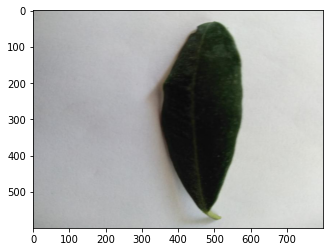

In [ ]:
classes_vgg19 = list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
  img = image.load_img(img_path, target_size = (224, 224))
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

img_url = '/content/drive/MyDrive/dataset_olive/test/Olive/B-705.jpg'
result_vgg19 = model_vgg19.predict([prepare(img_url)])
img_pred_vgg19 = image.load_img(img_url)
plt.imshow(img_pred_vgg19)

classresult_vgg19 = np.argmax(result_vgg19, axis=1)
print(classes_vgg19[classresult_vgg19[0]])

***2-3. AlexNet Model***

In [ ]:
# load model AlexNet
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_alexnet = load_model('/content/drive/MyDrive/Colab Notebooks/models_olive/model_cl1_alexnet.h5')

Tomato


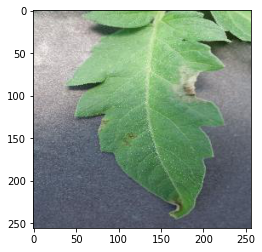

In [ ]:
classes_alexnet = list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
  img = image.load_img(img_path, target_size = (224, 224))
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

img_url = '/content/drive/MyDrive/dataset_olive/test/Tomato/09590524-981f-4dc5-b6e3-5225a0c48019___GHLB2ES Leaf 140.JPG'
result_alexnet = model_alexnet.predict([prepare(img_url)])
img_pred_alexnet = image.load_img(img_url)
plt.imshow(img_pred_alexnet)

classresult_alexnet = np.argmax(result_alexnet, axis=1)
print(classes_alexnet[classresult_alexnet[0]])